<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Dog_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 188 kB 34.1 MB/s 
     |████████████████████████████████| 1.2 MB 37.6 MB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 


In [2]:
import fastbook

In [3]:
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
!pip install utils

In [5]:
from fastai.vision.all import *
from utils import *

In [6]:
path = untar_data(URLs.PETS)

In [7]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [8]:
images = (path/'images').ls()

In [9]:
images

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_118.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_152.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_125.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_137.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_27.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_14.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_90.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_151.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_133.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_22.jpg')...]

In [10]:
fnname = images[0]

In [11]:
fnname

Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_118.jpg')

In [12]:
file = (path/'images').ls()

In [13]:
fname = file[0]

In [14]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_118.jpg')

In [15]:
#re.findall(r'(.+)_\d+.jpg$', fname)

In [16]:
pets = DataBlock(blocks = (ImageBlock,CategoryBlock),
                 get_items =get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller("(.+)_\d+.jpg$"), "name"),
                 item_tfms=Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale=0.75),
                 )
dls = pets.dataloaders(path/'images')

Presizing is a way of doing image augmentation that is designed to minimize data destruction while maintaining good performance

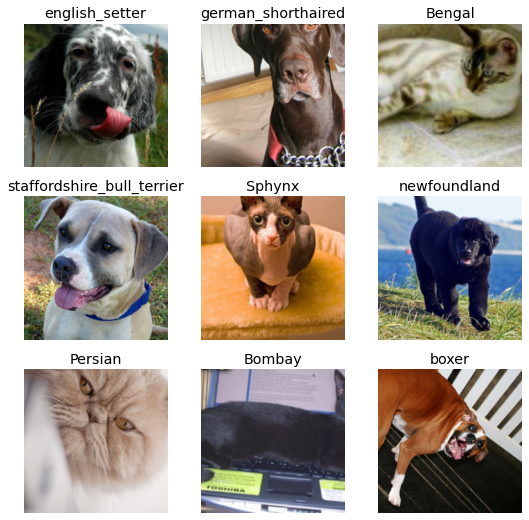

In [17]:
dls.show_batch()

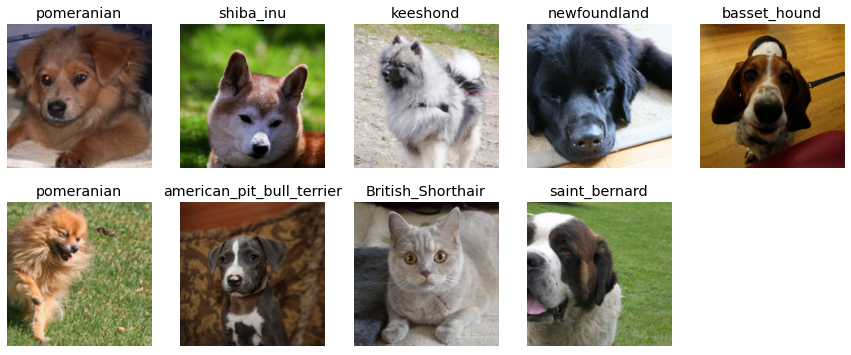

In [18]:
dls.show_batch(nrows=2, ncols =5)

In [19]:
pet1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42), 
                 get_y = using_attr(RegexLabeller("(.+)_\d+.jpg$"), "name"),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = pet1.dataloaders(path/"images")

In [20]:
#We use a summary method
pet1.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_169.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x396
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_169.jpg
    applying partial gives
      scottish_terrier
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(32)

Final sample: (PILImage mode=RGB size=500x396, TensorCategory(32))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
S

In [27]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.535739,0.309250,0.104871,02:07


epoch,train_loss,valid_loss,error_rate,time
0,0.505829,0.317176,0.094046,02:43
1,0.318937,0.200391,0.057510,02:43


In [22]:
x,y = dls.one_batch()

In [23]:
x

TensorImage([[[[0.4991, 0.5036, 0.4938,  ..., 0.6942, 0.6665, 0.6974],
          [0.4950, 0.4952, 0.4907,  ..., 0.7084, 0.7039, 0.7157],
          [0.4950, 0.4913, 0.4890,  ..., 0.7115, 0.7213, 0.7097],
          ...,
          [0.5487, 0.5466, 0.5708,  ..., 0.6684, 0.6774, 0.6739],
          [0.5474, 0.5471, 0.5593,  ..., 0.6587, 0.6656, 0.6696],
          [0.5549, 0.5612, 0.5744,  ..., 0.6622, 0.6613, 0.6581]],

         [[0.5034, 0.5036, 0.4938,  ..., 0.7247, 0.6837, 0.7248],
          [0.4993, 0.4974, 0.4907,  ..., 0.7251, 0.7137, 0.7302],
          [0.4993, 0.4913, 0.4890,  ..., 0.7347, 0.7325, 0.7275],
          ...,
          [0.5622, 0.5601, 0.5845,  ..., 0.6636, 0.6726, 0.6692],
          [0.5609, 0.5605, 0.5729,  ..., 0.6539, 0.6603, 0.6648],
          [0.5684, 0.5748, 0.5881,  ..., 0.6515, 0.6491, 0.6449]],

         [[0.5121, 0.5123, 0.5024,  ..., 0.7893, 0.7570, 0.7904],
          [0.5080, 0.5061, 0.4993,  ..., 0.7962, 0.7841, 0.8026],
          [0.5080, 0.4999, 0.4976,  .

In [24]:
y

TensorCategory([15, 27, 35, 33, 23, 22, 17, 10,  0,  5, 23, 17, 30, 26, 19, 22, 23,  1, 22, 34, 11, 35, 15, 29, 13,  6, 11,  9, 36, 22, 31,  4,  7, 32,  8, 23,  3, 33, 17, 35, 20,  0, 12,  6, 31,  4, 25, 27,
         3, 30, 36, 21, 13, 12, 25, 34, 17,  2,  7, 18, 12, 14, 10,  0], device='cuda:0')

In [25]:
len(y)

64

In [28]:
pred,_ = learn.get_preds(dl =[(x,y)])
pred[0]

TensorBase([5.3314e-06, 2.7216e-06, 3.4888e-05, 1.2336e-06, 7.5824e-06, 3.6746e-06, 1.2474e-05, 9.6199e-06, 1.2772e-05, 4.2480e-06, 4.9756e-07, 3.7386e-07, 7.3166e-06, 2.9352e-05, 3.9081e-02, 9.5944e-01,
        2.7433e-06, 1.8206e-07, 2.3380e-04, 3.5566e-05, 7.6804e-06, 1.1256e-05, 8.2406e-05, 1.6898e-06, 3.4374e-07, 1.4954e-05, 2.3724e-07, 4.3590e-07, 5.5647e-06, 1.8012e-07, 9.2033e-04, 1.1200e-06,
        2.3013e-07, 9.9163e-07, 5.9804e-07, 1.6852e-05, 5.4651e-06])

In [29]:
len(pred[0])

37

In [30]:
pred[0].sum()

TensorBase(1.0000)

In [31]:
x,y = dls.one_batch()

In [32]:
x

TensorImage([[[[ 1.9214e+00,  1.9340e+00,  1.9161e+00,  ...,  1.9123e+00,  1.9156e+00,  1.9194e+00],
          [ 1.9262e+00,  1.9300e+00,  1.9154e+00,  ...,  1.9132e+00,  1.9038e+00,  1.9076e+00],
          [ 1.9195e+00,  1.9312e+00,  1.9196e+00,  ...,  1.9213e+00,  1.9180e+00,  1.9246e+00],
          ...,
          [ 9.0899e-02,  5.2515e-01,  3.1958e-01,  ...,  9.7419e-01,  1.2792e+00,  6.3828e-01],
          [ 1.0365e+00,  8.3704e-01,  6.6997e-01,  ...,  3.9554e-01,  6.2437e-01,  5.7806e-01],
          [ 1.0986e+00,  1.4727e+00,  1.5801e+00,  ...,  6.2333e-02, -2.7430e-01,  1.3737e-01]],

         [[ 2.2595e+00,  2.2723e+00,  2.2541e+00,  ...,  2.2503e+00,  2.2536e+00,  2.2575e+00],
          [ 2.2644e+00,  2.2682e+00,  2.2438e+00,  ...,  2.2512e+00,  2.2416e+00,  2.2455e+00],
          [ 2.2576e+00,  2.2685e+00,  2.2423e+00,  ...,  2.2594e+00,  2.2561e+00,  2.2628e+00],
          ...,
          [ 4.9223e-02,  5.5114e-01,  4.2706e-01,  ...,  8.9572e-01,  1.3007e+00,  8.1977e-01],
   

In [33]:
#The dependent variable is Y which is he labeled data 
y

TensorCategory([27, 15,  6, 10,  4, 25, 30, 24, 34,  2, 28, 16, 27,  7, 13, 13, 16, 14, 35, 22, 30, 15,  9,  8, 15, 22, 26, 28, 10,  3, 21, 27,  5, 26, 29, 25, 25,  7, 34,  2, 20, 24, 23, 13, 18, 28,  5, 15,
         2, 16,  9, 36,  6,  3, 10, 17, 22,  6, 36, 30, 11, 28, 12, 25], device='cuda:0')

In [34]:
len(y)

64

In [35]:
learn.get_preds()

(TensorBase([[5.9822e-08, 1.9303e-09, 2.8056e-07,  ..., 1.9709e-08, 5.3028e-08, 4.3019e-07],
         [4.8511e-05, 3.6411e-05, 1.0587e-04,  ..., 2.3254e-05, 6.2789e-05, 1.1404e-05],
         [2.2159e-09, 1.6331e-10, 3.5008e-08,  ..., 4.8715e-09, 1.7875e-07, 2.8002e-10],
         ...,
         [4.4070e-10, 8.6025e-11, 1.6486e-09,  ..., 8.6925e-09, 1.8540e-07, 1.3164e-10],
         [1.3853e-08, 4.4332e-10, 3.0855e-06,  ..., 1.1576e-08, 9.7654e-09, 1.3980e-09],
         [8.4152e-09, 1.1936e-09, 6.9278e-08,  ..., 2.1052e-09, 9.8961e-07, 6.6636e-09]]),
 TensorCategory([31, 30, 21,  ..., 21, 24, 21]))

In [36]:
preds,_ = learn.get_preds()

In [37]:
preds

TensorBase([[5.9822e-08, 1.9303e-09, 2.8056e-07,  ..., 1.9709e-08, 5.3028e-08, 4.3019e-07],
        [4.8511e-05, 3.6411e-05, 1.0587e-04,  ..., 2.3254e-05, 6.2789e-05, 1.1404e-05],
        [2.2159e-09, 1.6331e-10, 3.5008e-08,  ..., 4.8715e-09, 1.7875e-07, 2.8002e-10],
        ...,
        [4.4070e-10, 8.6025e-11, 1.6486e-09,  ..., 8.6925e-09, 1.8540e-07, 1.3164e-10],
        [1.3853e-08, 4.4332e-10, 3.0855e-06,  ..., 1.1576e-08, 9.7654e-09, 1.3980e-09],
        [8.4152e-09, 1.1936e-09, 6.9278e-08,  ..., 2.1052e-09, 9.8961e-07, 6.6636e-09]])

In [38]:
preds[1][0]

TensorBase(4.8511e-05)

In [39]:
sum = preds.sum()

In [40]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.))

In [41]:
acts = torch.randn((6,2)) * 2

In [42]:
acts

tensor([[ 0.1560, -1.9368],
        [-0.6164,  1.1047],
        [-2.0798, -2.1778],
        [ 1.6429, -3.7728],
        [-1.2445, -2.9512],
        [ 1.8062, -0.5881]])

In [43]:
sum = acts.sigmoid()

In [44]:
sum

tensor([[0.5389, 0.1260],
        [0.3506, 0.7511],
        [0.1111, 0.1018],
        [0.8379, 0.0225],
        [0.2237, 0.0497],
        [0.8589, 0.3571]])

In [45]:
(acts[:,0] - acts[:,1]).sigmoid()

tensor([0.8902, 0.1517, 0.5245, 0.9956, 0.8464, 0.9164])

In [46]:
#Lets define a softmax activation  function 
def softmax(x):
  return exp(x)/ exp(x).sum(dim=1, keepdim =True)

In [47]:
softmax_activations = torch.softmax(acts, dim=1)

In [48]:
softmax_activations

tensor([[0.8902, 0.1098],
        [0.1517, 0.8483],
        [0.5245, 0.4755],
        [0.9956, 0.0044],
        [0.8464, 0.1536],
        [0.9164, 0.0836]])

In [49]:
import numpy as np 

In [50]:
x = np.exp(6)

In [51]:
y =np.exp(7)

In [52]:
z = np.exp(8)

In [53]:
r = np.exp(9)

In [54]:
out = x + y + z + r

In [55]:
out

12584.103866538306

In [56]:
div1 = x /out

In [57]:
div1

0.03205860328008499

In [58]:
div2 = y/out

In [59]:
div2

0.08714431874203256

In [60]:
div3 = r /out

In [61]:
div3

0.6439142598879724

In [62]:
div4 = z /out

In [63]:
div4

0.23688281808991013

In [64]:
sumOne = div1 + div2 + div3 + div4

In [65]:
sumOne

1.0

In [66]:
ans = -1.18 * np.log(0.57)

In [67]:
ans

0.6633003234211787

In [68]:
x11 =np.exp(1.04)

In [69]:
x11

2.82921701435156

In [70]:
x12 = np.exp(0.0)

In [71]:
x12

1.0

In [72]:
x13 = np.exp(0.14)

In [73]:
x13

1.1502737988572274

In [74]:
sum = x11 + x12 + x13

In [75]:
sum

4.979490813208788

In [76]:
div1 = x11 /sum 

In [77]:
div2 = x12/sum

In [78]:
div3 = x13/sum

In [79]:
div1 + div2 + div3

0.9999999999999999

In [80]:
x1 =  np.exp(1.04)

In [81]:
x2 = np.exp(0.0)

In [82]:
x3 = np.exp(0.14)

In [83]:
sum = x1 + x2 + x3

In [84]:
sum 

4.979490813208788

In [85]:
div1 = x1/sum 

In [86]:
div1

0.5681739600456076

In [87]:
div2 = x2 /sum 
div2

0.20082374634518088

In [88]:
div3 = x3 /sum
div3

0.23100229360921143

In [89]:
prob = -1 * np.log(0.57)

In [90]:
prob

0.5621189181535413

In [91]:
x,y = dls.one_batch()

In [92]:
y

TensorCategory([ 9, 32, 25, 29, 14, 24,  0, 18, 24, 32, 18,  3, 36,  8, 20, 25, 17, 25, 22,  3, 36,  8, 20, 36, 30, 31,  5, 20, 26, 13, 13,  8, 12, 12,  8,  9,  0, 12, 35, 22,  6, 10, 26,  1, 25,  3,  8,  2,
        28,  2, 14, 17, 27, 35,  4, 28,  7,  0, 23,  0,  7, 24,  3, 12], device='cuda:0')

The dependent variables are the labels while the independent variables and the features ##

In [93]:
preds,_ = learn.get_preds()

In [94]:
len = preds[0]

In [95]:
len.shape

torch.Size([37])

In [96]:
len.sum()

TensorBase(1.)

In [97]:
acts = torch.randn((6,2)) * 2

In [98]:
acts

tensor([[-1.8278, -1.3738],
        [-0.1449, -2.4355],
        [-1.4474, -0.2974],
        [ 1.8805,  3.0474],
        [ 1.2489,  0.4982],
        [-1.6813,  1.4027]])

In [99]:
sig =  acts.sigmoid()

In [100]:
sig.sum()

tensor(5.6824)

In [101]:
activ = (acts[:,0] - acts[:,1]).sigmoid()

In [102]:
#Softmax function 
def softmax(x):
  return exp(x)/exp(x).sum(dim =1, keepDim=True)

In [103]:
sm_act = torch.softmax(acts, dim=1)

In [104]:
sm_act

tensor([[0.3884, 0.6116],
        [0.9081, 0.0919],
        [0.2405, 0.7595],
        [0.2374, 0.7626],
        [0.6793, 0.3207],
        [0.0438, 0.9562]])

Softmax is the multicategory equivalent of sigmoid, we use it when we have more than two categories and the probalities of the categories must add up to one 

In [105]:
def mnist_loss(inputs, targets):
  inputs = inputs.sigmoid()
  return (torch.where(targets==1,1- inputs, input)).mean()

In [106]:
targ = tensor([0,1,0,1,1,0])

In [107]:
index = range(6) 
sm_act[index,targ]

tensor([0.3884, 0.0919, 0.2405, 0.7626, 0.3207, 0.0438])

In [108]:
-sm_act[range(6), targ]

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

In [109]:
F.nll_loss(sm_act, targ, reduction='none')

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

In [110]:
#Taking the log 

In [111]:
def mnist_loss(inputs, targets):
  inputs.sigmoid()
  return torch.where(target== 1, 1-inputs , inputs).mean()

In [112]:
tensor = [0,1,0,1,1,0]
target = torch.tensor(tensor)

In [113]:
sm_act #These are the softmax activations

tensor([[0.3884, 0.6116],
        [0.9081, 0.0919],
        [0.2405, 0.7595],
        [0.2374, 0.7626],
        [0.6793, 0.3207],
        [0.0438, 0.9562]])

In [114]:
#Tensor indexing
index = range(6) 
sm_act[index,target]

tensor([0.3884, 0.0919, 0.2405, 0.7626, 0.3207, 0.0438])

In [115]:
-sm_act[index,target]

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

In [116]:
#Pytorch negative log likelihood
F.nll_loss(sm_act,target,reduction='none')

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:72: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


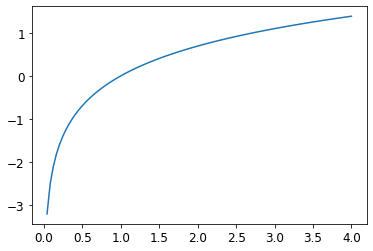

In [117]:
fastbook.plot_function(torch.log, min = 0, max = 4)

In [118]:
loss_func = nn.CrossEntropyLoss()

In [119]:
loss_func(sm_act, target) #Pytorch loss function accessible through a class instance

tensor(0.9304)

In [120]:
F.cross_entropy(sm_act, target)#Pytorch loss function accessible through methods 

tensor(0.9304)

In [121]:
nn.CrossEntropyLoss(reduction='none')(sm_act, target)

tensor([0.8109, 1.1823, 0.9860, 0.4646, 0.8885, 1.2500])

In [122]:
#Model interpretation
targ = torch.tensor([0,1,0,1,1,0])


In [123]:
#The combinations of the softmax and the loglikelihood is known as the cross entropy loss
loss_fn = torch.nn.CrossEntropyLoss()

In [124]:
activations = torch.rand((6,2)) * 2

In [125]:
activations

tensor([[0.8208, 1.7840],
        [0.9091, 0.5259],
        [1.7692, 0.6657],
        [1.2372, 1.8238],
        [0.7581, 1.8358],
        [0.3984, 0.9958]])

In [126]:
softmax_activations = torch.softmax(activations, dim = 1)

In [127]:
torch.softmax(activations, dim=1)

tensor([[0.2762, 0.7238],
        [0.5946, 0.4054],
        [0.7509, 0.2491],
        [0.3574, 0.6426],
        [0.2540, 0.7460],
        [0.3549, 0.6451]])

In [128]:
loss_func(activations, targ) #The loss functions calculates the distance between our model's predictions and the desired outputs

tensor(0.7078)

In [129]:
#Activations
activations = torch.rand((6,2)) * 2 

In [130]:
softmax_activations = torch.softmax(activations, dim = 1)

In [131]:
#Loss functions calculate the distance between our model predictions and  desired target values 
#This is the class method of initializing the loss function
loss_fn = torch.nn.CrossEntropyLoss()

In [132]:
target = torch.tensor([0,1,0,1,1,0])

In [133]:
#we now initialize the loss function 
loss_fn(activations,target) #We pass in the activations and the target 

tensor(0.8278)

In [134]:
#Function method of initializing our loss function 
F.cross_entropy(activations, target)

tensor(0.8278)

In [135]:
#By default Pytorch takes the mean of the loss functions of all our objects and we can stop this by setting the reduction to none
torch.nn.CrossEntropyLoss(reduction='none')(activations,target)

tensor([0.6251, 1.2659, 0.6369, 0.8366, 1.2148, 0.3874])

Cross entropy loss is the  combination of the loglikelihood and the softmax activations  

In [144]:
#Let plot a confusion matrix to see how well our model is doing 
interpretation = ClassificationInterpretation.from_learner(learn) #Create a variable called interpretation and initialize the class Classification interpretation  then pass in the model predictions we want to interpret 

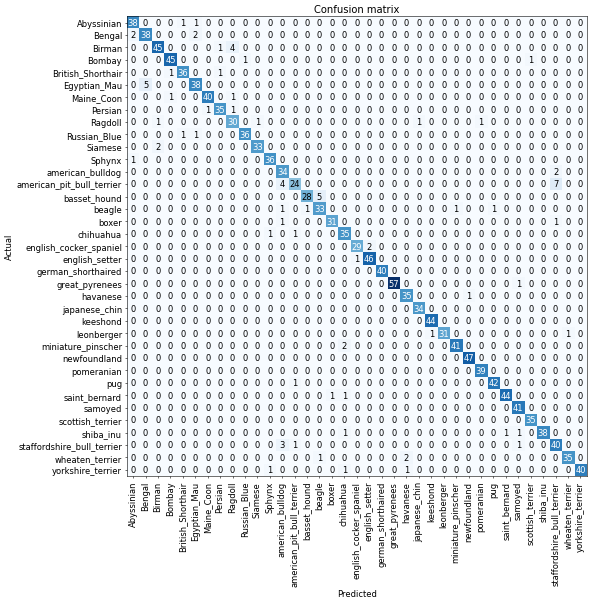

In [145]:
#Now we can plot the confusion matrix based on the interpretation to see how well the model is doing 
interpretation.plot_confusion_matrix(figsize=(12,12),dpi=50 )

This interpretation has returned a giant matrix since we have 37 by 37 entries, this is hard to read instead we can use the most_confused method to return the most incorrect predictions

In [146]:
interpretation = ClassificationInterpretation.from_learner(learn)

In [147]:
#We now plot our confusion matrix to see how well or poorly our model is performing on the class 
#But since we are using the most_confused method this function returns the predictions that were made incorrectly 
interpretation.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Egyptian_Mau', 'Bengal', 5),
 ('basset_hound', 'beagle', 5)]

In [151]:
learn = cnn_learner(dls,resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.678856,7.017562,0.549391,02:07


epoch,train_loss,valid_loss,error_rate,time
0,3.780368,2.060851,0.593369,02:43


In [153]:
learn = cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1,base_lr=1e-3) #1e-3 is similar to 1 * 10-3

epoch,train_loss,valid_loss,error_rate,time
0,1.972667,0.365737,0.118403,02:08


epoch,train_loss,valid_loss,error_rate,time
0,0.561514,0.250029,0.081867,02:44


In [ ]:
#The learning rate finder gives us points on the curve to help us these rules gives us around the same value
learn = cnn_learner(dls , resnet34, metrics= error_rate)
#lr_min,lr_steep = learn.lr_find()

In [159]:
learn = cnn_learner(dls, resnet34,metrics=error_rate)
learn.fine_tune(2,base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.301656,0.320061,0.100812,02:09


epoch,train_loss,valid_loss,error_rate,time
0,0.566188,0.372781,0.121110,02:51
1,0.356741,0.225505,0.071719,02:48


Transfer learning is a technique in machine learning where we re-use parts of a pre-trained model as a starting point for a new task.

In [ ]:
#Unfreezing and transfer learning 

#The learning rate finder plots  the loss aganist the  learning rate to see which learning rate value contributes to a minimum loss and it does this using logarithms